(18,)


'Implement Recognizer'

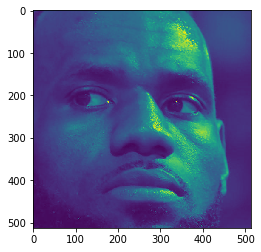

In [3]:
# Import libraries
import os  # import images 
from PIL import Image  # PIL is image python library 
import cv2  # import face recognizer 
import pickle  # save labels 
import numpy as np  # turn images to trainable data
from pathlib import Path  # allow us to work with directory
import matplotlib.pyplot as plt  # plt is used to plot images
%matplotlib inline

# We use pathlib to get directory path   to the current file
BASE_DIR = Path().resolve()
# Images directory
image_dir = os.path.join(BASE_DIR, "images")

# Import Haar Cascade classifier
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()

# keep labels and paths in lists
y_labels = []
x_train = []

# Create ID for labels
current_id = 0
# for every label that is created, we will add one => need a dictionary
label_ids = {}
# loop through images
for read, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg"):
            # print out path of this file
            path = os.path.join(read, file)

            "Get label from directories"
            # grab name from the folder to give it a label, replace any space with the dash "-"
            label = os.path.basename(os.path.dirname(path)).replace(" ", "-").lower()

            "Create training labels"
            # if the label/person name is not in the dictionary, we add it and its associated id to the dictionary
            if not label in label_ids:
                label_ids[label] = current_id
                current_id += 1
            # use the id of that label
            id_ = label_ids[label]

            "Convert images to numpy array"
            # get directory path
            pil_image = Image.open(path).convert("L")
            # convert to numpy array, unit8 is type
            image_array = np.array(pil_image, "uint8")  

            "Region of Interest (ROI) in Training Data"
            # detector
            faces = face_cascade.detectMultiScale(image_array, scaleFactor=1.5, minNeighbors=5)
            # face detection inside of actual image
            for (x, y, w, h) in faces:
                roi = image_array[y:y+h, x:x+w]
                x_train.append(roi)
                y_labels.append(id_)  # use number values for labels
                
                
"Using Pickle to Save Label Ids"
with open("labels.pickle", 'wb') as f:  # 'wb' as I'm writing bytes, as file or 'f'
    # dump in label id to that file
    pickle.dump(label_ids, f)

print(np.array(x_train).shape[:])
plt.imshow(x_train[3])

"Train the OpenCV Recognizer"
# Put the training data x_train coming through region adventure, convert y_labels into numpy labels 
recognizer.train(x_train, np.array(y_labels))
recognizer.write("trainer.yml")

"Implement Recognizer"